<a href="https://colab.research.google.com/github/H6WU6R/DSA3101-Group-4/blob/B4-Cost-Effectiveness-of-Campaigns/cba_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
marketing_df = pd.read_csv('digital_marketing_campaign_dataset.csv')

In [3]:
# Exploratory Data Analysis
marketing_df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Income,0
CampaignChannel,0
CampaignType,0
AdSpend,0
ClickThroughRate,0
ConversionRate,0
WebsiteVisits,0


In [4]:
marketing_df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [5]:
marketing_df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [6]:
marketing_df.dtypes

,0
CustomerID,int64
Age,int64
Gender,object
Income,int64
CampaignChannel,object
CampaignType,object
AdSpend,float64
ClickThroughRate,float64
ConversionRate,float64
WebsiteVisits,int64


In [7]:
print(marketing_df['CampaignChannel'].unique())
print(marketing_df['CampaignType'].unique())

['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
['Awareness' 'Retention' 'Conversion' 'Consideration']


In [8]:
# Campaign type + channel segmentation
def segment_by_campaign(row):
    return f"{row['CampaignType']} - {row['CampaignChannel']}"

marketing_df['CampaignSegment'] = marketing_df.apply(segment_by_campaign, axis=1)

In [9]:
print(marketing_df['CampaignSegment'].unique())

['Awareness - Social Media' 'Retention - Email' 'Awareness - PPC'
 'Conversion - PPC' 'Awareness - Referral' 'Conversion - Social Media'
 'Retention - PPC' 'Awareness - SEO' 'Conversion - Email'
 'Awareness - Email' 'Consideration - PPC' 'Consideration - SEO'
 'Consideration - Email' 'Conversion - Referral'
 'Retention - Social Media' 'Retention - Referral'
 'Consideration - Referral' 'Retention - SEO'
 'Consideration - Social Media' 'Conversion - SEO']


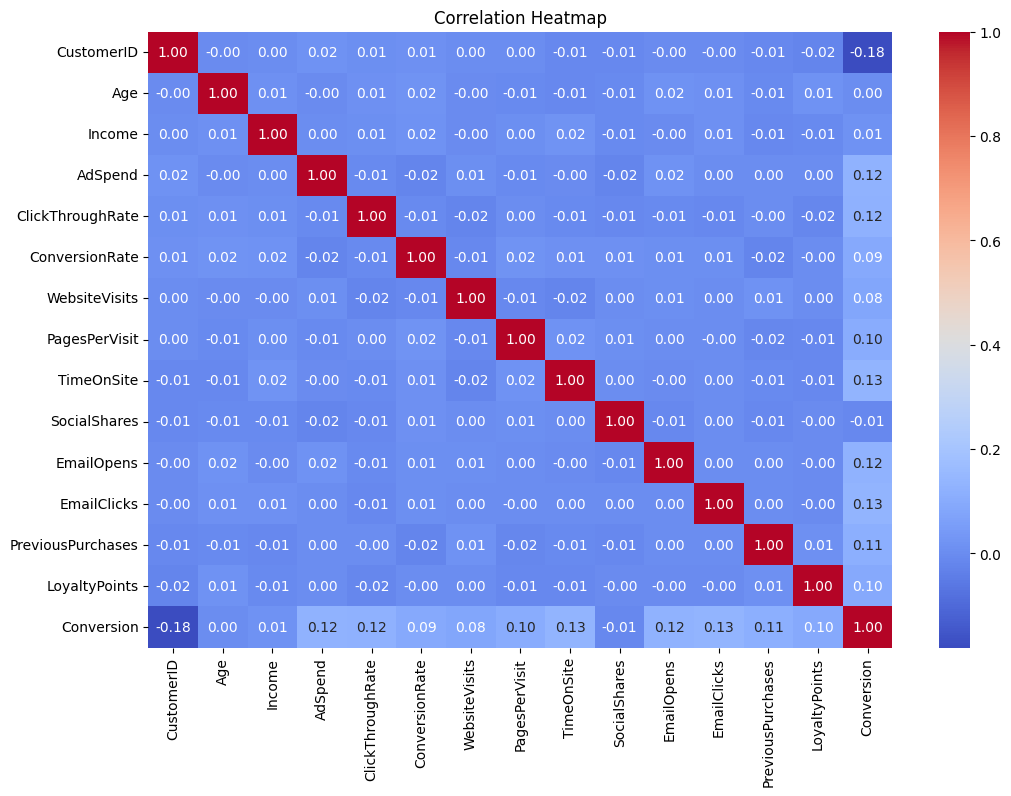

In [10]:
# Select only numeric columns
numeric_df = marketing_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# List of columns to exclude
exclude_cols = ['CustomerID', 'CampaignChannel', 'CampaignType', 'CampaignSegment']

# Separate columns into numerical and categorical (excluding the ones in exclude_cols)
numerical_cols = marketing_df.select_dtypes(include=[np.number]).columns.difference(exclude_cols)
categorical_cols = marketing_df.select_dtypes(exclude=[np.number]).columns.difference(exclude_cols)

# One-hot encode categorical columns
marketing_df_encoded = pd.get_dummies(marketing_df, columns=categorical_cols)

# Select the relevant columns for correlation (including one-hot encoded categorical features)
# Exclude original categorical columns to avoid the error
columns_to_use = marketing_df_encoded.select_dtypes(include=[np.number]).columns.difference(exclude_cols)

# List of group-by columns
group_by_cols = ['CampaignType', 'CampaignChannel', 'CampaignSegment']

# Loop over each group column and calculate correlation with other variables
for group_col in group_by_cols:
    # Ensure group_col is numerical or one-hot encoded and calculate correlation
    corr_matrix = marketing_df_encoded[columns_to_use].corrwith(marketing_df_encoded[group_col].astype('category').cat.codes)

    # Print out the correlation results for each group column
    print(f"Correlation with {group_col}:")
    print(corr_matrix.sort_values(ascending=False))
    print("\n" + "="*50 + "\n")


Correlation with CampaignType:
Conversion           0.030408
Age                  0.028861
PreviousPurchases    0.015909
EmailOpens           0.008683
ClickThroughRate     0.006342
EmailClicks          0.004273
TimeOnSite          -0.001065
Income              -0.003600
AdSpend             -0.006337
ConversionRate      -0.007341
LoyaltyPoints       -0.008473
WebsiteVisits       -0.011455
SocialShares        -0.011859
PagesPerVisit       -0.022308
dtype: float64


Correlation with CampaignChannel:
Age                  0.013444
LoyaltyPoints        0.012434
WebsiteVisits        0.010729
SocialShares         0.009901
EmailOpens           0.007819
ConversionRate       0.006738
Income               0.006295
TimeOnSite           0.003564
PagesPerVisit        0.000311
Conversion          -0.004190
PreviousPurchases   -0.005818
AdSpend             -0.006697
EmailClicks         -0.007526
ClickThroughRate    -0.009278
dtype: float64


Correlation with CampaignSegment:
Age                  0.0312

In [12]:
# Define numeric columns for aggregation
numeric_columns = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
                   'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
                   'PreviousPurchases', 'LoyaltyPoints', 'Conversion']

# Create a dictionary to store results of grouping and calculating AdSpend, Conversion, and CPA
adspend_dfs = {}
cpa_dfs = {}
conversion_dfs = {}

# Loop through each group-by column combination for AdSpend, Conversion, and CPA
for group_col in group_by_cols:
    # Group the dataframe by the group_col and sum the numeric columns for AdSpend and Conversion
    df_grouped = marketing_df.groupby(group_col)[numeric_columns].sum().reset_index()

    # Calculate AdSpend (sum of AdSpend)
    adspend_dfs[group_col] = df_grouped[[group_col, 'AdSpend']].sort_values(by='AdSpend', ascending=False)

    # Calculate Conversion (mean of Conversion)
    df_grouped_conversion = marketing_df.groupby(group_col)['Conversion'].mean().reset_index()
    conversion_dfs[group_col] = df_grouped_conversion.sort_values(by='Conversion', ascending=False)

    # Calculate CPA (AdSpend / sum of Conversion)
    df_grouped[f'{group_col}CPA'] = df_grouped['AdSpend'] / df_grouped['Conversion']
    cpa_dfs[group_col] = df_grouped[[group_col, f'{group_col}CPA']].sort_values(by=f'{group_col}CPA', ascending=False)


In [13]:
# Display CPA for each campaign grouping
for group_col, cpa_dfs in cpa_dfs.items():
    print(f"CPA for {group_col}: ")
    print(cpa_dfs)
    print("\n")


CPA for CampaignType: 
    CampaignType  CampaignTypeCPA
0      Awareness      5924.659510
3      Retention      5845.818169
1  Consideration      5797.339021
2     Conversion      5312.056205


CPA for CampaignChannel: 
  CampaignChannel  CampaignChannelCPA
0           Email         5809.281071
4    Social Media         5718.213229
2        Referral         5700.605195
3             SEO         5696.029342
1             PPC         5612.071856


CPA for CampaignSegment: 
                 CampaignSegment  CampaignSegmentCPA
4       Awareness - Social Media         6164.753208
15             Retention - Email         6163.325027
3                Awareness - SEO         6046.769112
7       Consideration - Referral         5852.584055
16               Retention - PPC         5843.193301
8            Consideration - SEO         5829.247546
2           Awareness - Referral         5827.461147
1                Awareness - PPC         5810.146538
5          Consideration - Email         5803.

In [14]:
# Display AdSpend for each campaign grouping
for group_col, df_adspend in adspend_dfs.items():
    print(f"AdSpend for {group_col}: ")

    # Format AdSpend column without affecting other columns
    df_adspend['AdSpend'] = df_adspend['AdSpend']

    # Display the dataframe with formatted AdSpend
    print(df_adspend)
    print("\n")



AdSpend for CampaignType: 
    CampaignType       AdSpend
2     Conversion  1.030008e+07
0      Awareness  1.007785e+07
1  Consideration  9.861274e+06
3      Retention  9.768362e+06


AdSpend for CampaignChannel: 
  CampaignChannel       AdSpend
2        Referral  8.653519e+06
1             PPC  8.199237e+06
0           Email  7.871576e+06
3             SEO  7.740904e+06
4    Social Media  7.542323e+06


AdSpend for CampaignSegment: 
                 CampaignSegment       AdSpend
12         Conversion - Referral  2.226189e+06
2           Awareness - Referral  2.220263e+06
17          Retention - Referral  2.170368e+06
11              Conversion - PPC  2.157813e+06
10            Conversion - Email  2.150688e+06
1                Awareness - PPC  2.056792e+06
7       Consideration - Referral  2.036699e+06
6            Consideration - PPC  2.021319e+06
5          Consideration - Email  2.002153e+06
3                Awareness - SEO  2.001481e+06
13              Conversion - SEO  1.980840e+0

In [15]:
# Display Conversion for each campaign grouping
for group_col, df_conversion in conversion_dfs.items():
    print(f"Conversion for {group_col}: ")
    print(df_conversion)
    print("\n")


Conversion for CampaignType: 
    CampaignType  Conversion
2     Conversion    0.933558
3      Retention    0.858243
1  Consideration    0.855634
0      Awareness    0.855634


Conversion for CampaignChannel: 
  CampaignChannel  Conversion
2        Referral    0.883072
1             PPC    0.882779
3             SEO    0.876774
0           Email    0.870263
4    Social Media    0.868334


Conversion for CampaignSegment: 
                 CampaignSegment  Conversion
13              Conversion - SEO    0.940299
11              Conversion - PPC    0.939597
10            Conversion - Email    0.932692
12         Conversion - Referral    0.930337
14     Conversion - Social Media    0.923706
2           Awareness - Referral    0.883991
6            Consideration - PPC    0.868812
18               Retention - SEO    0.866324
19      Retention - Social Media    0.862162
17          Retention - Referral    0.860092
1                Awareness - PPC    0.859223
16               Retention - PPC   

In [16]:
import pandas as pd

# Define numeric columns for aggregation
numeric_columns = ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion']

# List of group-by columns
group_by_cols = ['CampaignType', 'CampaignChannel', 'CampaignSegment']

# Set display option to avoid scientific notation
pd.set_option('display.float_format', '{:,.2f}'.format)

# Loop through each group-by column and calculate AdSpend, Conversion, and CPA
final_dfs = {}

for group_col in group_by_cols:
    # Group by the column and aggregate AdSpend and Conversion
    df_grouped = marketing_df.groupby(group_col).agg({
        'AdSpend': 'sum',  # Total AdSpend
        'Conversion': 'mean'  # Average Conversion
    }).reset_index()

    # Calculate CPA
    df_grouped['CPA'] = df_grouped['AdSpend'] / df_grouped['Conversion']

    # Reorder columns for clarity
    df_grouped = df_grouped[[group_col, 'AdSpend', 'Conversion', 'CPA']]

    # Store the final dataframe in the dictionary
    final_dfs[group_col] = df_grouped

# Display the final combined dataframes for each group type
for group_col, df_final in final_dfs.items():
    print(f"Final table for {group_col}:")
    print(df_final)
    print("\n")


Final table for CampaignType:
    CampaignType       AdSpend  Conversion           CPA
0      Awareness 10,077,845.83        0.86 11,778,223.11
1  Consideration  9,861,273.67        0.86 11,525,109.97
2     Conversion 10,300,076.98        0.93 11,033,140.74
3      Retention  9,768,362.16        0.86 11,381,807.98


Final table for CampaignChannel:
  CampaignChannel      AdSpend  Conversion          CPA
0           Email 7,871,575.85        0.87 9,045,050.63
1             PPC 8,199,236.98        0.88 9,287,978.92
2        Referral 8,653,518.69        0.88 9,799,340.33
3             SEO 7,740,903.88        0.88 8,828,845.48
4    Social Media 7,542,323.25        0.87 8,685,965.89


Final table for CampaignSegment:
                 CampaignSegment      AdSpend  Conversion          CPA
0              Awareness - Email 1,845,083.91        0.84 2,193,212.95
1                Awareness - PPC 2,056,791.87        0.86 2,393,780.37
2           Awareness - Referral 2,220,262.70        0.88 2,511,63

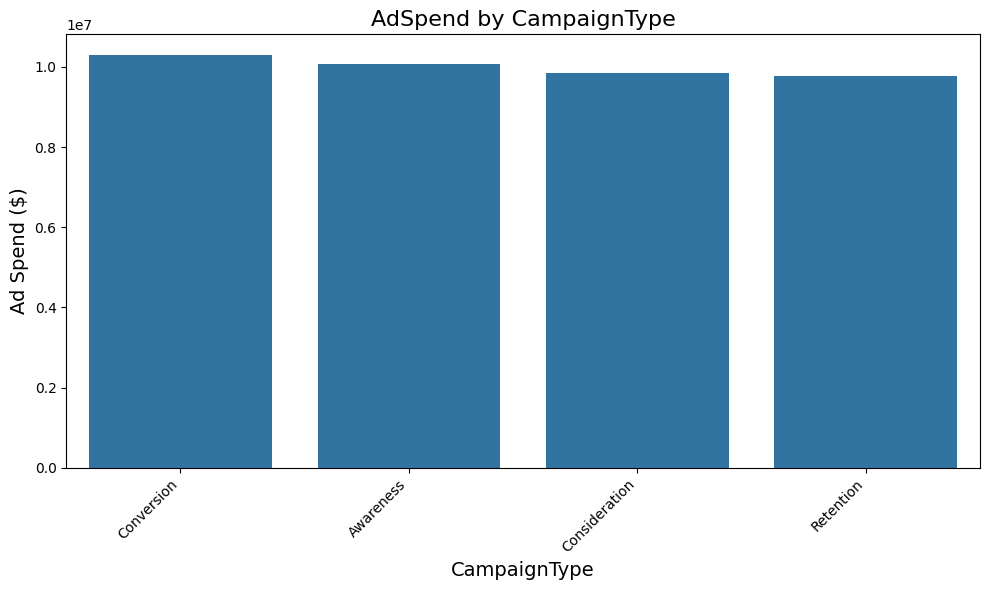

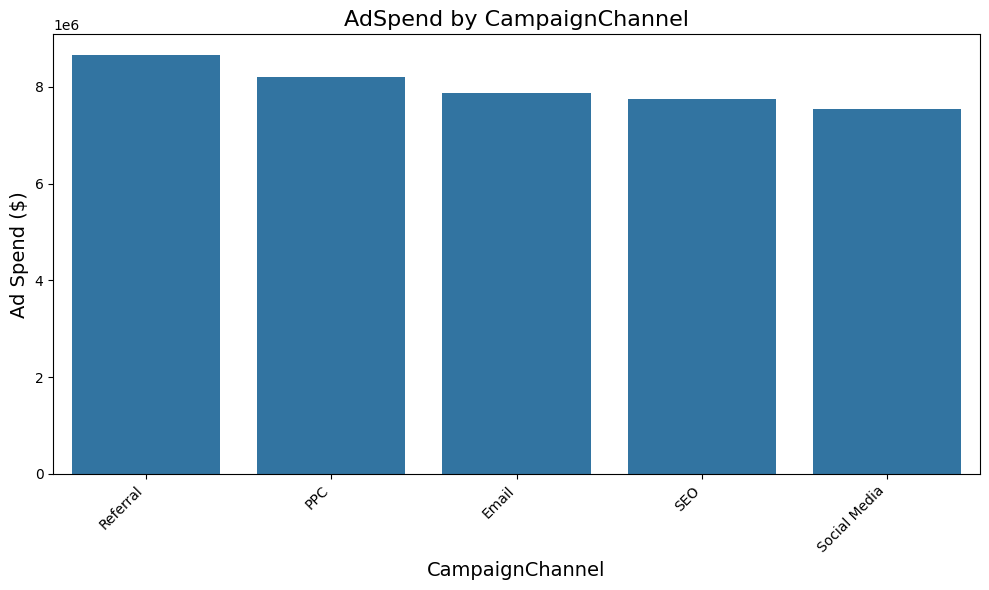

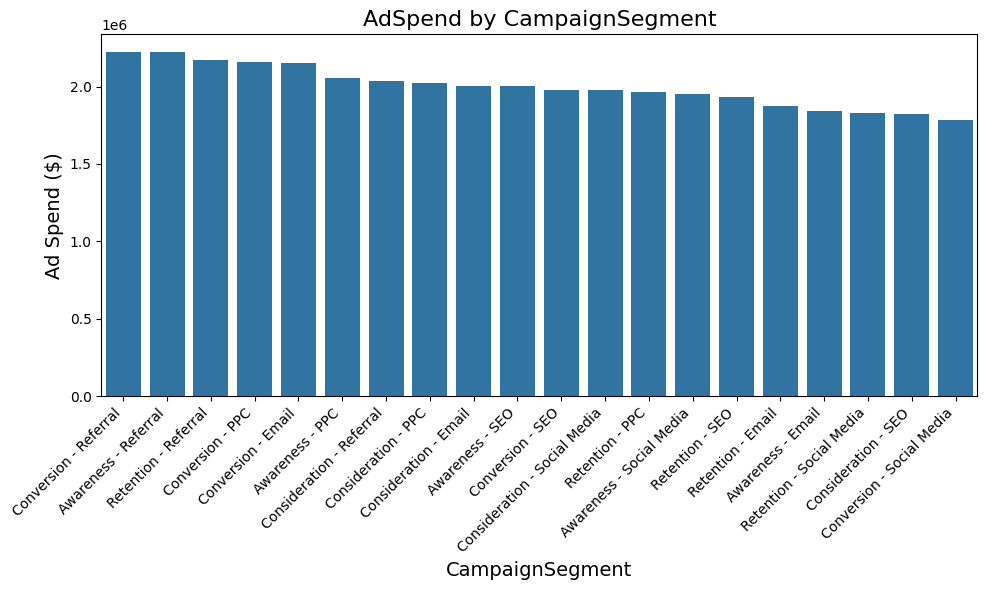

In [17]:
# Function to plot AdSpend, Conversion, and CPA
def plot_metric(df, group_col, metric_col, title, ylabel):
    # Sort the dataframe by the metric column in descending order
    df_sorted = df.sort_values(by=metric_col, ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=group_col, y=metric_col, data=df_sorted)  # Plot sorted values
    plt.title(title, fontsize=16)
    plt.xlabel(group_col, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Loop through each group column in final_dfs and create plots for AdSpend
for group_col, df_final in final_dfs.items():
    # Plot AdSpend
    plot_metric(df_final, group_col, 'AdSpend', f"AdSpend by {group_col}", 'Ad Spend ($)')


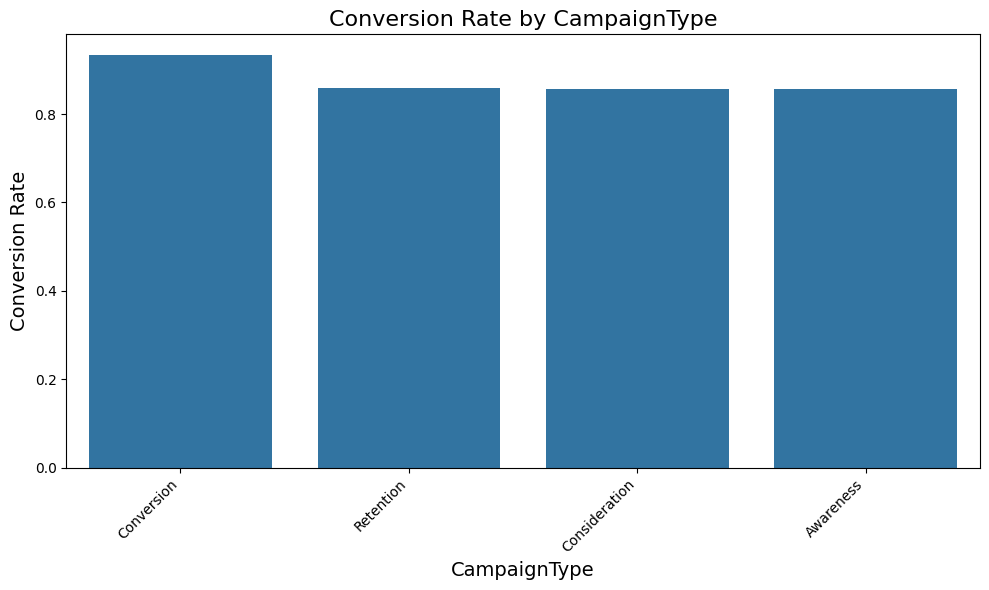

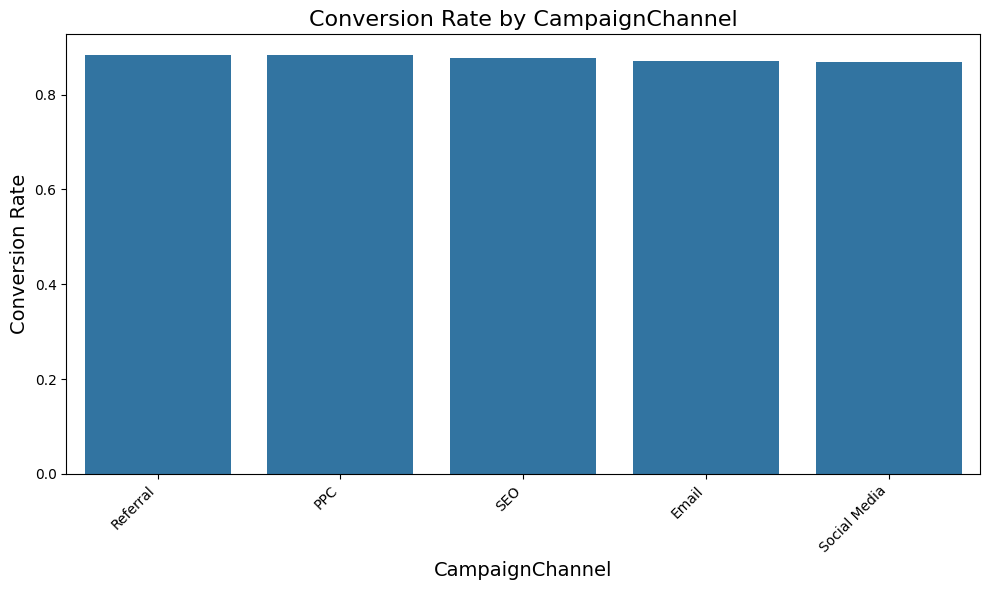

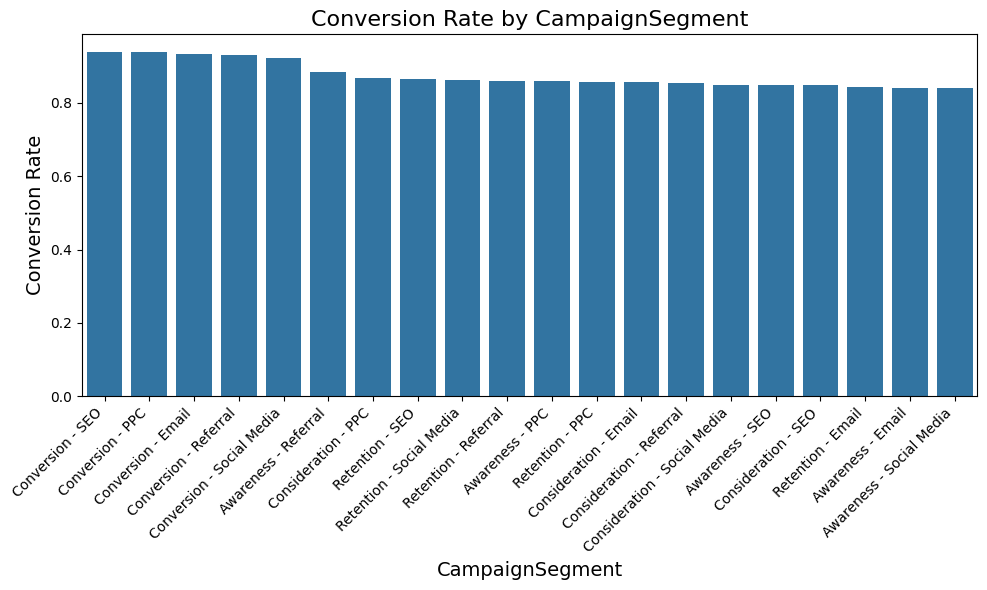

In [18]:
# Loop through each group column in final_dfs and create plots for Conversion
for group_col, df_final in final_dfs.items():
    # Plot Conversion
    plot_metric(df_final, group_col, 'Conversion', f"Conversion Rate by {group_col}", 'Conversion Rate')

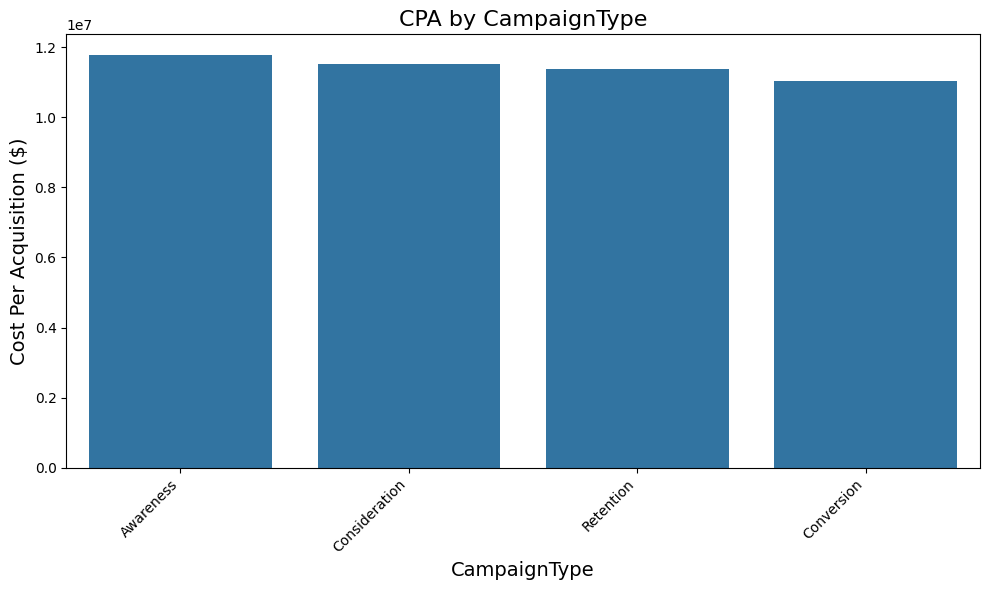

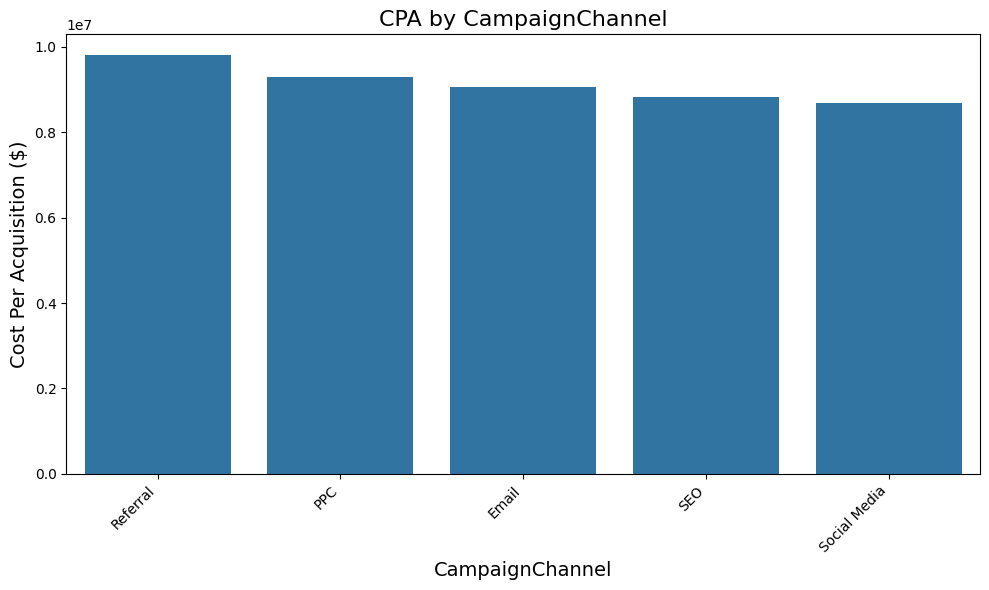

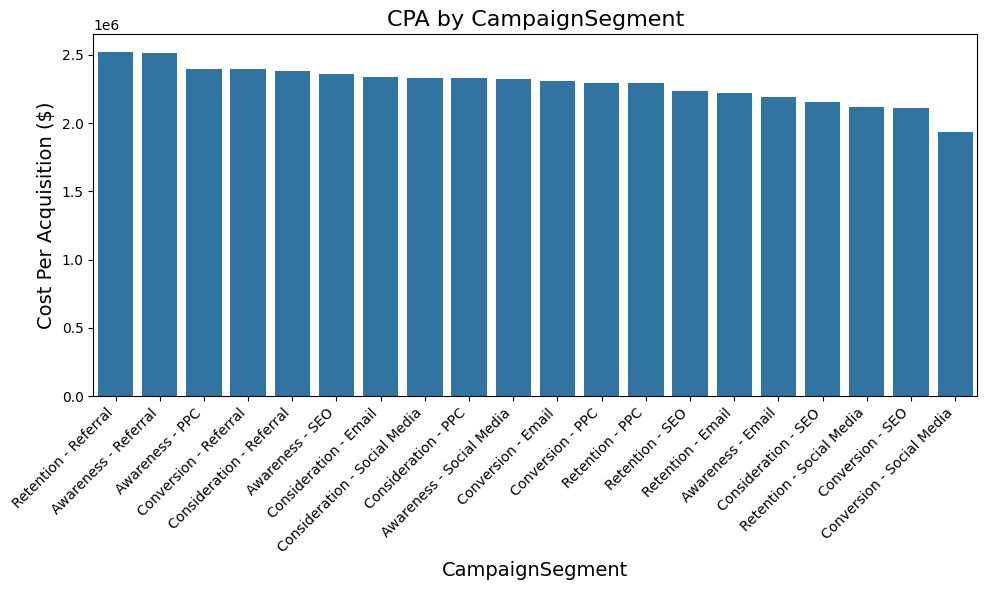

In [19]:
# Loop through each group column in final_dfs and create plots for CPA
for group_col, df_final in final_dfs.items():
    # Plot CPA
    plot_metric(df_final, group_col, 'CPA', f"CPA by {group_col}", 'Cost Per Acquisition ($)')

In [20]:
marketing_df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion',
       'CampaignSegment'],
      dtype='object')

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 2. Handle missing values (using median imputation for numerical columns)
marketing_df.fillna(marketing_df.median(numeric_only=True), inplace=True)

# 3. Select numerical features for clustering
numerical_features = [
    'Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
    'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
    'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'Conversion'
]
X = marketing_df[numerical_features]

# 4. Encode categorical features (using pd.get_dummies)
categorical_features = ['Gender', 'CampaignType', 'CampaignChannel', 'CampaignSegment']

# One-Hot Encoding for categorical features using pd.get_dummies
encoded_df = pd.get_dummies(marketing_df[categorical_features], drop_first=True)

# Concatenate encoded categorical features with numerical features
X = pd.concat([X, encoded_df], axis=1)

# 5. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Dimensionality Reduction using PCA (Reduce to 3 components for easier clustering and visualization)
pca = PCA(n_components=3)  # Reduce to 3 components
X_pca = pca.fit_transform(X_scaled)

# 7. Determine optimal number of clusters using silhouette score
best_k = 0
best_score = -1

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    if score > best_score:
        best_k = k
        best_score = score

print("Best k:", best_k, "with silhouette score:", best_score)

# 8. Apply K-Means clustering with best_k on PCA-reduced data
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
marketing_df['CustomerSegment'] = kmeans.fit_predict(X_pca)

# 9. Analyze cluster profiles
# Group by 'CustomerSegment' and get the mean of numerical features
numerical_profiles = marketing_df.groupby('CustomerSegment')[numerical_features].mean()

# Group by 'CustomerSegment' and get the mode (most frequent value) for categorical features
categorical_profiles = marketing_df.groupby('CustomerSegment')[categorical_features].agg(lambda x: x.mode()[0])

# Combine numerical and categorical profiles
cluster_profiles = pd.concat([numerical_profiles, categorical_profiles], axis=1)

print(cluster_profiles)


Best k: 9 with silhouette score: 0.6634711975629725
                  Age    Income  AdSpend  ClickThroughRate  ConversionRate  \
CustomerSegment                                                              
0               44.02 85,188.21 5,028.45              0.16            0.10   
1               43.02 85,484.15 5,046.62              0.16            0.10   
2               43.65 83,885.96 4,992.47              0.16            0.11   
3               42.63 84,205.53 5,151.42              0.16            0.11   
4               44.28 83,452.99 4,977.91              0.15            0.10   
5               43.55 85,575.52 4,827.32              0.15            0.10   
6               43.58 83,481.61 5,004.18              0.15            0.10   
7               43.53 84,530.90 4,949.13              0.15            0.11   
8               45.13 84,359.09 5,002.67              0.15            0.10   

                 WebsiteVisits  PagesPerVisit  TimeOnSite  SocialShares  \
CustomerSegmen

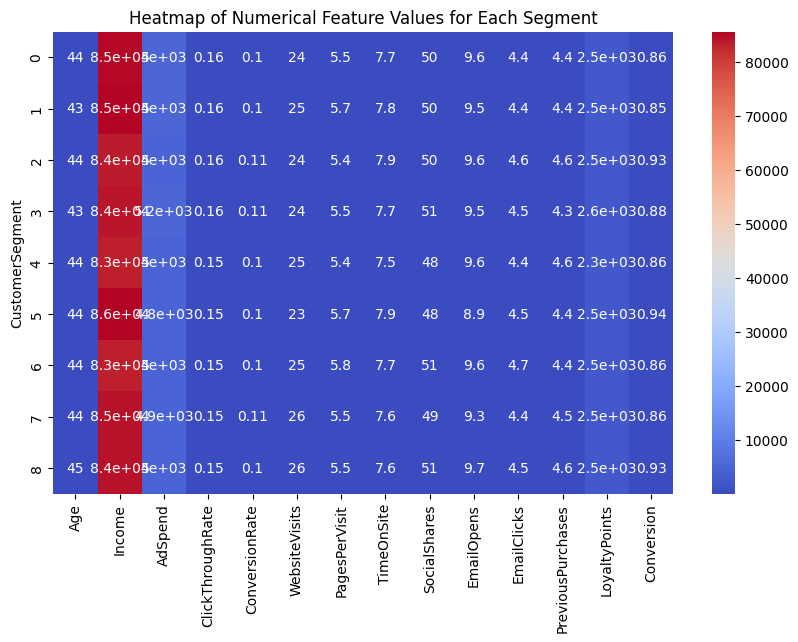

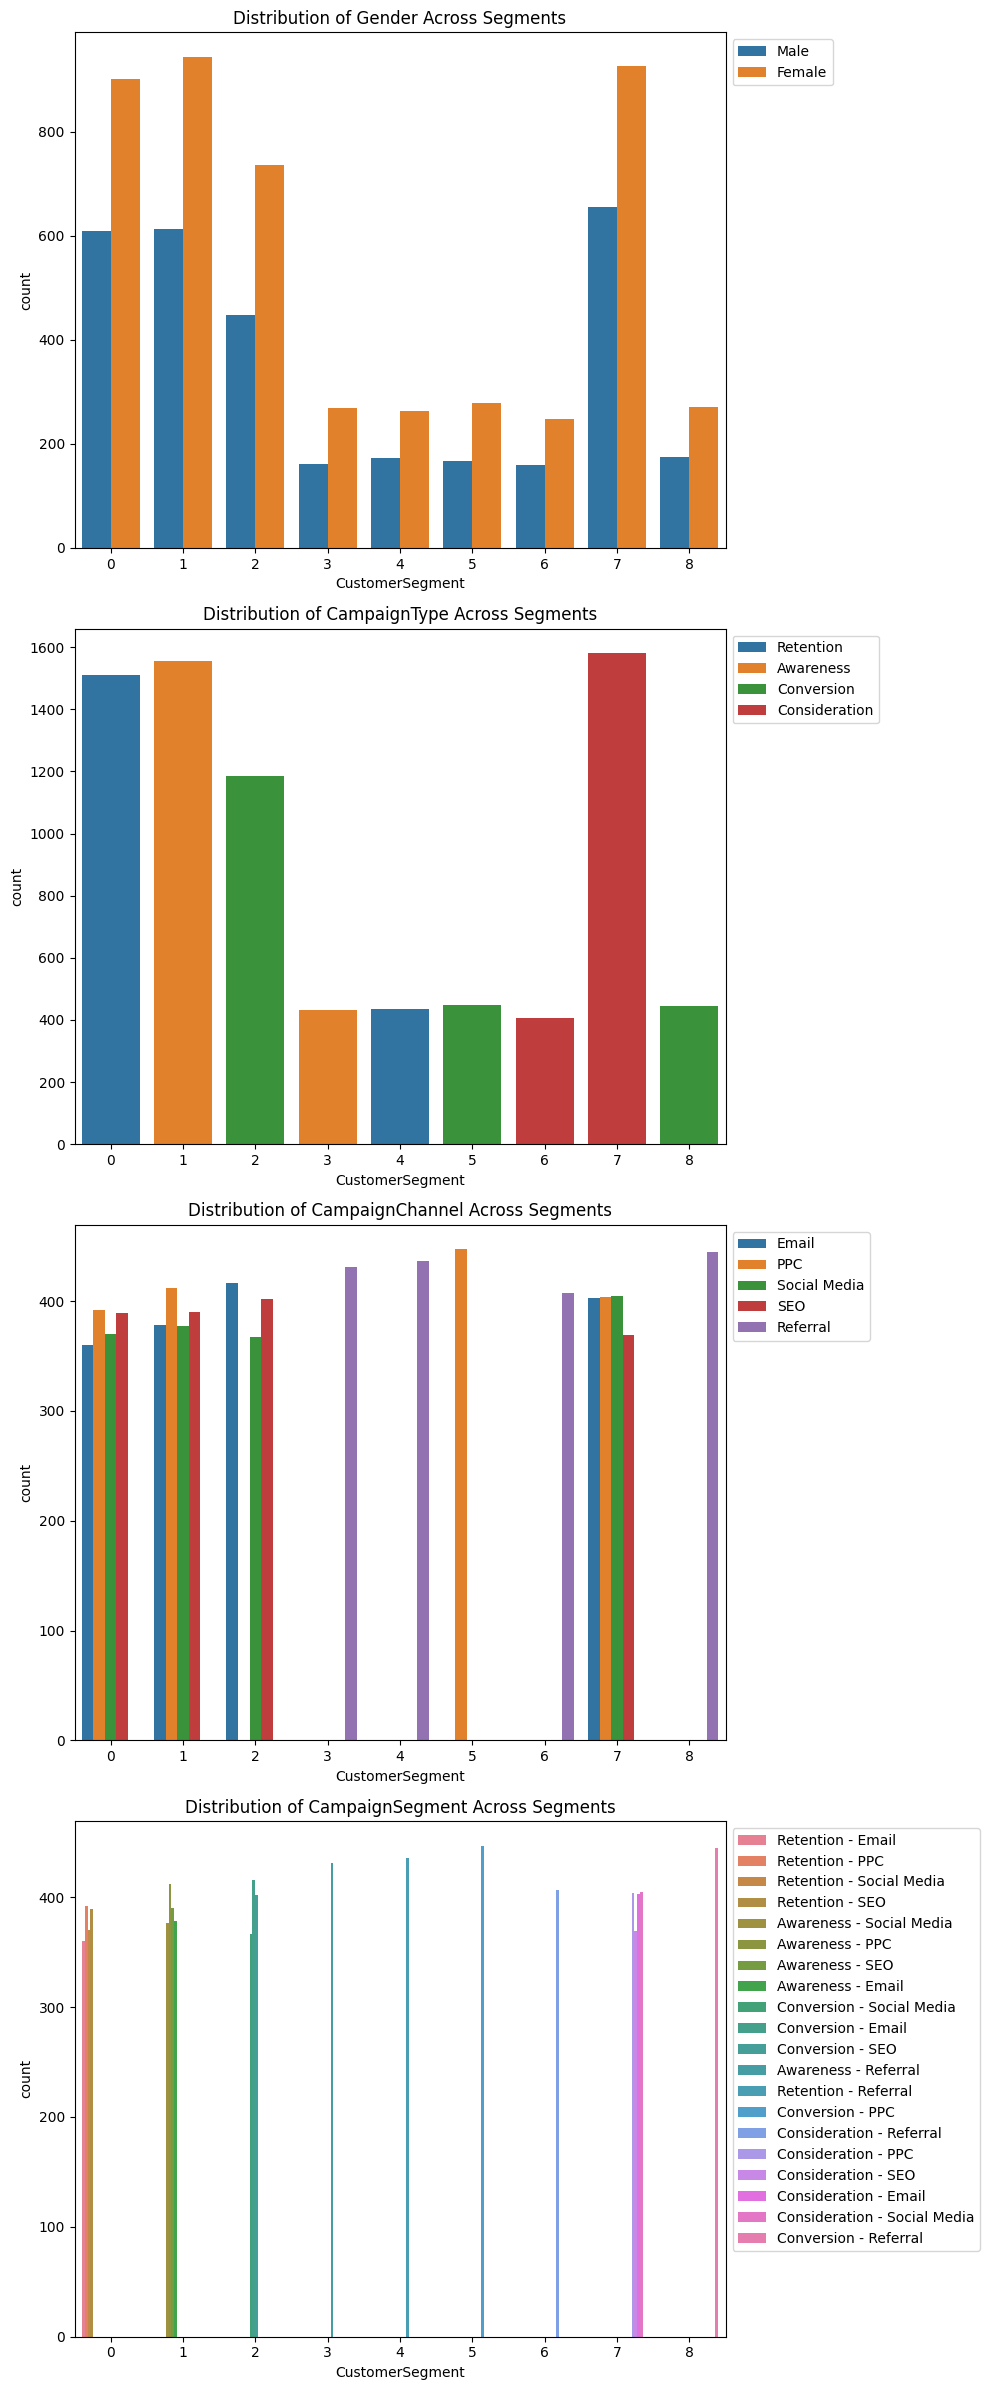

In [22]:
import math
# 8. Heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_profiles, annot=True, cmap='coolwarm', cbar=True)
plt.title("Heatmap of Numerical Feature Values for Each Segment")
plt.show()

# 9. Countplots for categorical features across customer segments
num_features = len(categorical_features)
num_cols = 1  # Fixed number of columns
num_rows = num_features  # Number of rows is equal to the number of features

# Adjust the figure size for a single column layout
plt.figure(figsize=(10, 6 * num_rows))

for i, feature in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i + 1)  # Create one plot per row
    sns.countplot(x='CustomerSegment', hue=feature, data=marketing_df)
    plt.title(f"Distribution of {feature} Across Segments")

    # Reposition the legend outside the plot to prevent it from blocking the bars
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot

plt.tight_layout()
plt.show()



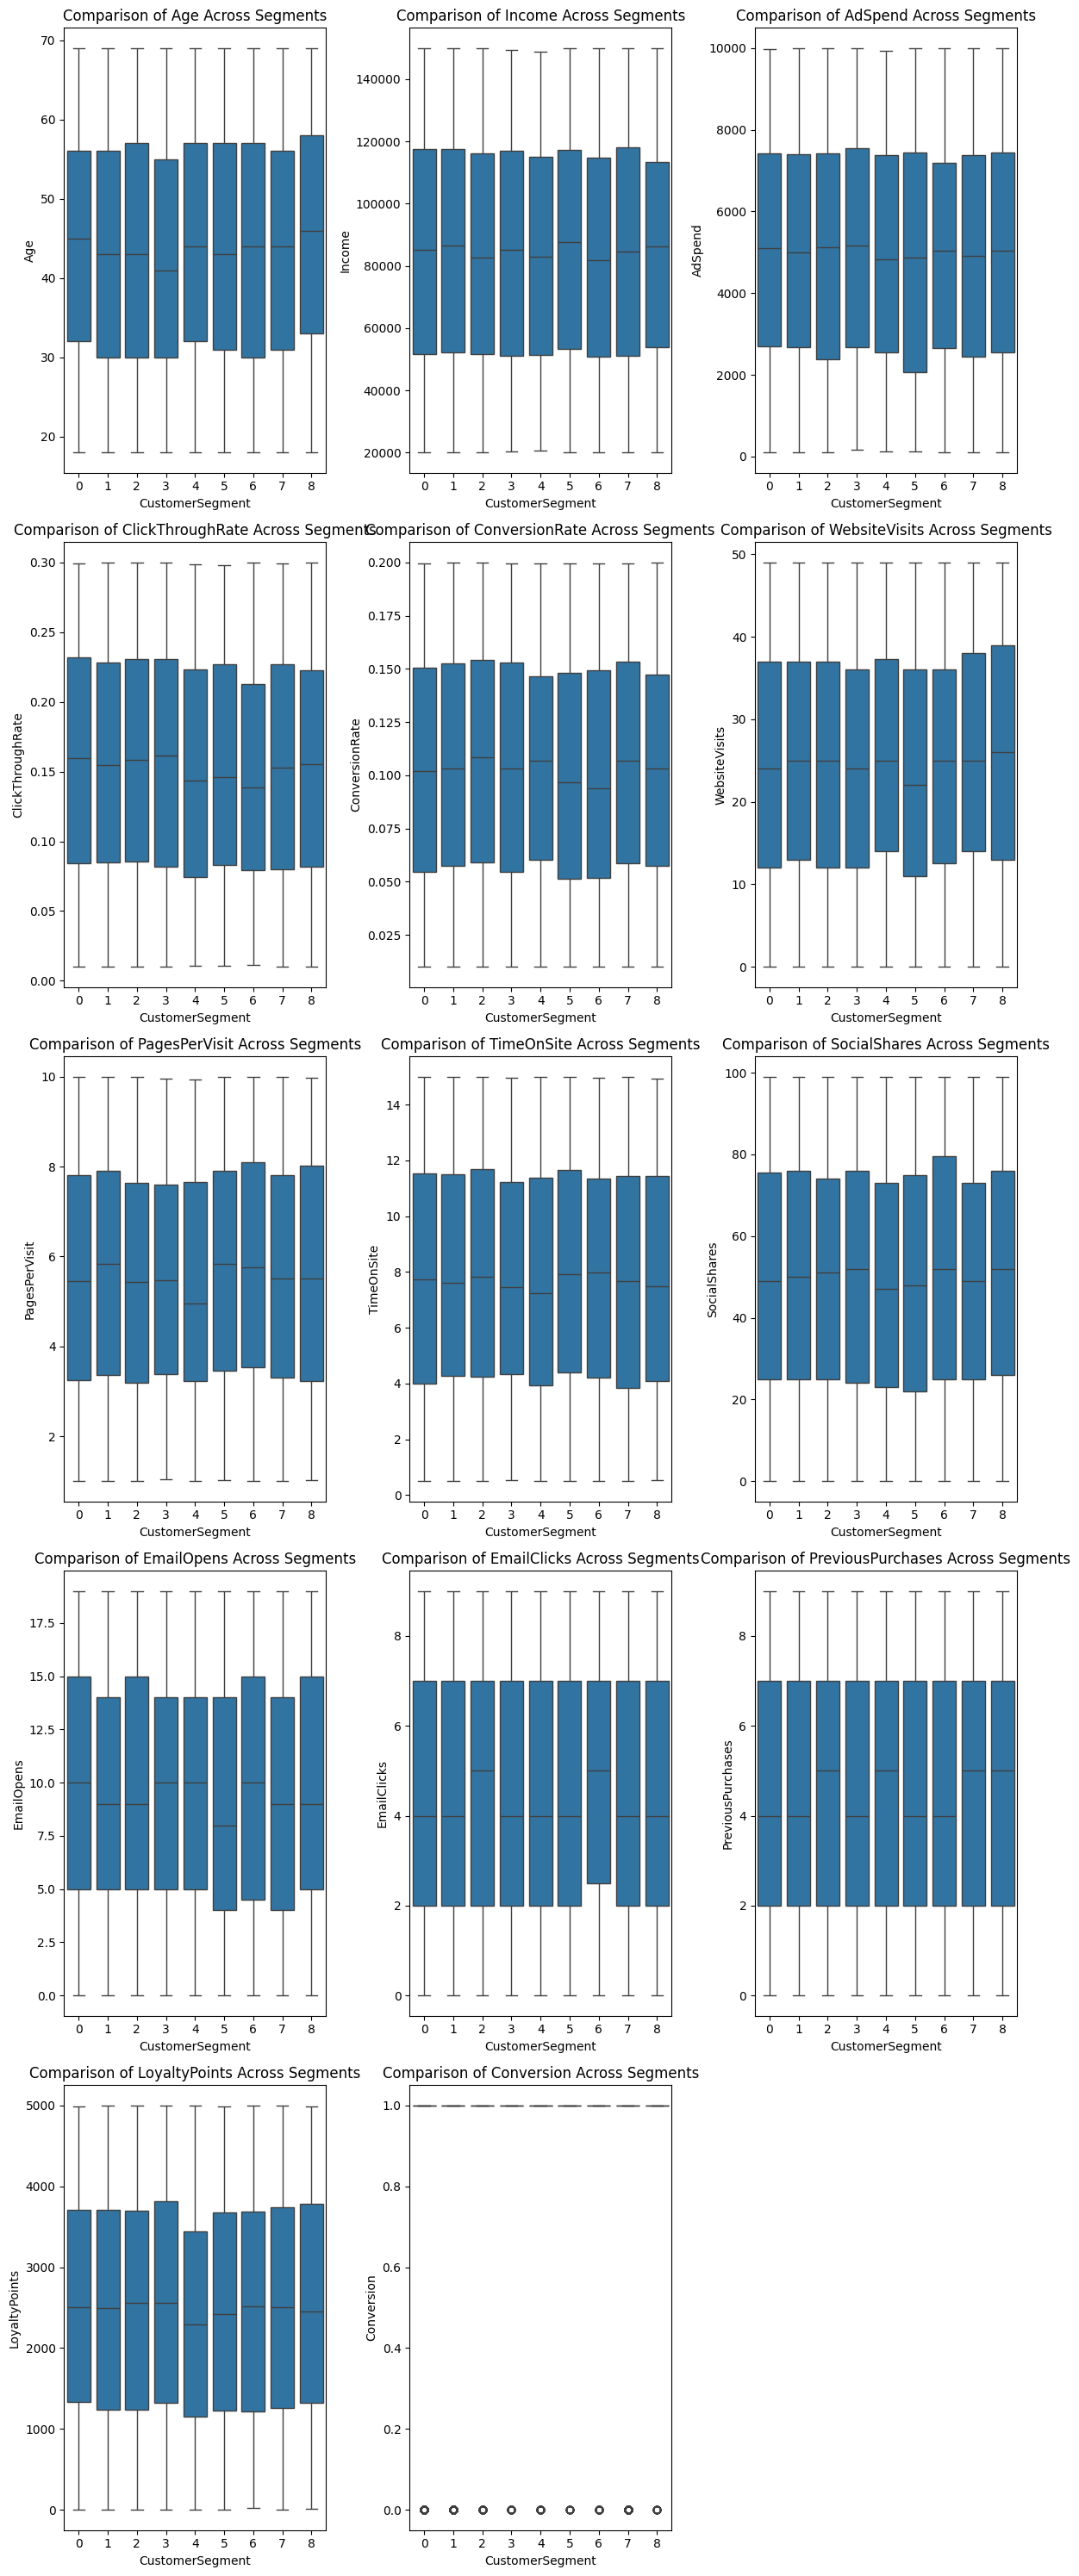

In [23]:
# 10. Comparison of numerical features across segments (Boxplots)
# Adjust the number of rows and columns dynamically based on the number of numerical features
num_features = len(numerical_features)
num_cols = 3  # Fixed number of columns for better layout
num_rows = math.ceil(num_features / num_cols)  # Calculate required rows

plt.figure(figsize=(12, 6 * num_rows))

for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='CustomerSegment', y=feature, data=marketing_df)
    plt.title(f"Comparison of {feature} Across Segments")

plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

# Load the marketing data (assuming you already have it as marketing_df)
# Load the bank revenue data
xlsx_file = "bankrevenue.xlsx"
df = pd.read_excel(xlsx_file, sheet_name=0)

# Save as CSV (optional)
csv_file = "bankrevenue.csv"
df.to_csv(csv_file, index=False)

# Load the bank revenue dataset
bank_revenue_df = pd.read_csv('bankrevenue.csv')



In [25]:
# Step 1: Map Rev_Total into marketing_df based on Age
# Merge bank revenue data with marketing_df based on the 'Age' column
marketing_df = marketing_df.merge(bank_revenue_df[['AGE', 'Rev_Total']], left_on='Age', right_on='AGE', how='left')


In [26]:
# Step 2: Calculate total revenue per CustomerSegment
segment_revenue = marketing_df.groupby('CustomerSegment')['Rev_Total'].sum().reset_index()

# Step 3: Merge total revenue data with cluster profiles
cluster_profiles = cluster_profiles.merge(segment_revenue, on='CustomerSegment', how='left')

# Step 4: Calculate CPA (if not already done)
cluster_profiles['CPA'] = cluster_profiles['AdSpend'] / cluster_profiles['ConversionRate']

# Step 5: Compute ROI for each customer segment using CPA
cluster_profiles['ROI'] = (cluster_profiles['Rev_Total'] - cluster_profiles['CPA']) / cluster_profiles['CPA']

# View the results
print(cluster_profiles[['CustomerSegment', 'CPA', 'ROI']])


   CustomerSegment       CPA  ROI
0                0 48,818.29 6.90
1                1 48,459.74 7.07
2                2 46,641.60 5.37
3                3 48,964.46 1.25
4                4 47,899.04 1.26
5                5 47,801.63 1.30
6                6 50,067.99 1.04
7                7 46,520.00 7.44
8                8 48,595.71 1.28


In [42]:
# Setting personalisation levels
# Step 1: Rank CPA (lower is better) into Low, Medium, High
cluster_profiles['CPA_Level'] = pd.qcut(cluster_profiles['CPA'], 3, labels=['Low', 'Medium', 'High'])

# Step 2: Rank ROI (higher is better) into Low, Medium, High
cluster_profiles['ROI_Level'] = pd.qcut(cluster_profiles['ROI'], 3, labels=['Low', 'Medium', 'High'])

# Step 3: Assign points based on CPA and ROI levels
cluster_profiles['CPA_Points'] = cluster_profiles['CPA_Level'].map({'Low': 3, 'Medium': 2, 'High': 1}).astype(int)
cluster_profiles['ROI_Points'] = cluster_profiles['ROI_Level'].map({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)

cluster_profiles['Personalization_Score'] = cluster_profiles['CPA_Points'] + cluster_profiles['ROI_Points']

# Step 4: Assign Personalization Level based on the score
def assign_personalization_level(score):
    if score >= 5:
        return 'High'
    elif score == 4:
        return 'Medium'
    else:
        return 'Low'

# Apply the function to create the Personalization_Level column
cluster_profiles['Personalization_Level'] = cluster_profiles['Personalization_Score'].apply(assign_personalization_level)

# View the final DataFrame with Personalization levels
cluster_profiles[['CustomerSegment', 'CPA_Level', 'ROI_Level', 'Personalization_Level']]

,CustomerSegment,CPA_Level,ROI_Level,Personalization_Level
0,0,High,High,Medium
1,1,Medium,High,High
2,2,Low,Medium,High
3,3,High,Low,Low
4,4,Medium,Low,Low
5,5,Low,Medium,High
6,6,High,Low,Low
7,7,Low,High,High
8,8,Medium,Medium,Medium


In [46]:
# Cost-benefit analysis
cluster_profiles['Cost_Benefit_Ratio'] = cluster_profiles['Rev_Total'] / cluster_profiles['CPA']
cluster_profiles['Cost_Benefit_Ratio']

,Cost_Benefit_Ratio
0,7.90
1,8.07
2,6.37
3,2.25
4,2.26
5,2.30
6,2.04
7,8.44
8,2.28
